In [1]:
import json

In [2]:
json_file= open("../data/results/test 2/scores_info.txt", "r") 
scores_info = json.load(json_file)

In [3]:
scores_info['GRS'] = {'mean': 0.668, 'std': 0.002}
scores_info['RS'] = {'mean': 0.666, 'std': 0.002} #from first experiment 

In [4]:
scores_info

{'GRS_100': {'mean': 0.6674590799006869, 'std': 0.0010305259879038954},
 'RS_100': {'mean': 0.6627090283296673, 'std': 0.002200474470596113},
 'GRS_75': {'mean': 0.6673347659686246, 'std': 0.001143914437668295},
 'RS_75': {'mean': 0.6624504569887075, 'std': 0.002053794666269355},
 'GRS_50': {'mean': 0.6663082716758508, 'std': 0.0010631944516123837},
 'RS_50': {'mean': 0.6610820315997675, 'std': 0.0020377103949608287},
 'GRS': {'mean': 0.668, 'std': 0.002},
 'RS': {'mean': 0.666, 'std': 0.002}}

In [5]:
json_file= open("../data/results/test 2/iters_info.txt", "r") 
iters_info = json.load(json_file)

In [6]:
from matplotlib import pyplot as plt

In [7]:
iters_labels = list(iters_info.keys())
iters_info = list(iters_info.values())

means_iters = []
std_iters = []

for experiment in iters_info:
    means_iters.append(experiment['mean'])
    std_iters.append(experiment['std'])

In [8]:
scores_labels = list(scores_info.keys())
scores_info = list(scores_info.values())

means_scores = []
std_scores = []

for experiment in scores_info:
    means_scores.append(experiment['mean'])
    std_scores.append(experiment['std'])

In [9]:
def autolabel(rects, add=0):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()+add
        ax.annotate('{}'.format(round(height-add,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

In [10]:
import seaborn as sns
sns.set()

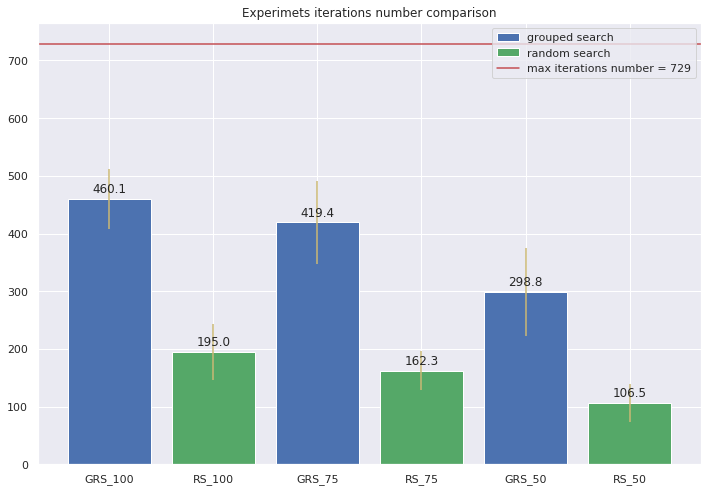

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(range(len(iters_labels)), means_iters,
        yerr=std_iters, align="center", ecolor = 'y', color = ('b','g'))

ax.set_xticks(range(0,len(iters_labels)))
ax.set_xticklabels(iters_labels)

line = ax.axhline(729, color='r', label = 'max_iter_num')
autolabel(rects1)
ax.set_title('Experimets iterations number comparison')
plt.legend(handles= (rects1[::2],rects1[1::2],line),
           labels = ('grouped search', 'random search', 'max iterations number = 729'),
           loc = 'upper right')
fig.tight_layout()
plt.savefig("../graphs/test 2/iter_comp.jpg")
plt.show()

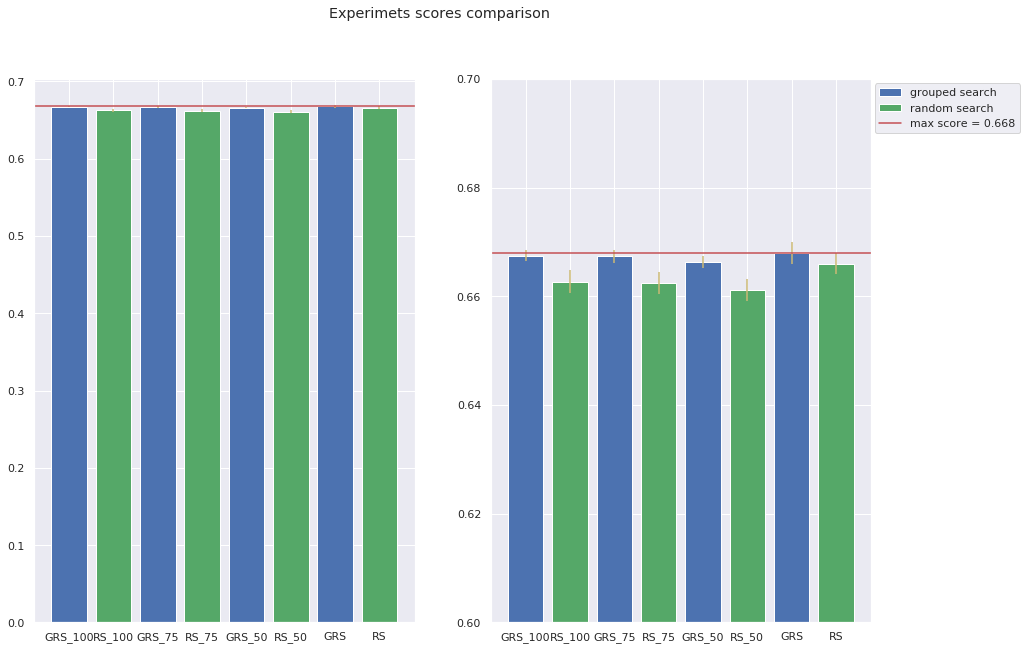

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))


rects2 = axs[0].bar(range(len(scores_labels)), means_scores,
        yerr=std_scores, align="center", ecolor = 'y', color = ('b','g'))

axs[0].set_xticks(range(0,len(scores_labels)))
axs[0].set_xticklabels(scores_labels)
line = axs[0].axhline(0.668, color='r')


rects3 = axs[1].bar(range(len(scores_labels)), means_scores,
        yerr=std_scores, align="center", ecolor = 'y', color = ('b','g'))

axs[1].set_xticks(range(0,len(scores_labels)))
axs[1].set_xticklabels(scores_labels)
line = axs[1].axhline(0.668, color='r')
axs[1].set_ylim(0.6, 0.7)


fig.suptitle('Experimets scores comparison')
plt.legend(handles= (rects2[::2],rects2[1::2],line),
           labels = ('grouped search', 'random search', 'max score = 0.668'),
           loc = (1.01,0.9))

plt.savefig("../graphs/test 2/scores_comp.jpg")
plt.show()